In [1]:
import numpy as np

X = np.random.rand (3,5)
print (X.shape)  # X matriz m samples x n features
print (X)

(3, 5)
[[0.41292531 0.18796454 0.87688259 0.2270562  0.41479323]
 [0.1824867  0.40744787 0.71674467 0.79900682 0.30240164]
 [0.44218124 0.53803113 0.82525425 0.06169428 0.615782  ]]


In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
print (principalComponents)
Xaprox = pca.inverse_transform(principalComponents)
print (Xaprox)

[[-1.32387192e-01  2.17340756e-01  6.31845889e-17]
 [ 4.92769439e-01 -5.80818377e-02  6.31845889e-17]
 [-3.60382247e-01 -1.59258918e-01  6.31845889e-17]]
[[0.41292531 0.18796454 0.87688259 0.2270562  0.41479323]
 [0.1824867  0.40744787 0.71674467 0.79900682 0.30240164]
 [0.44218124 0.53803113 0.82525425 0.06169428 0.615782  ]]


In [3]:
m = X.shape[0]  # número de muestras
n = X.shape[1]  # número de features
K = 3 # Número de features finales

Sigma = ( 1/m ) *  np.dot( X.T , X)
U,S,V = np.linalg.svd (Sigma)
print (S[2:4])
print (np.sum(S[0:5]))
print (S)
print (np.sum(S))
Ureduce = U [:,:K]
Z = np.dot (Ureduce.T,X.T).T
print (Z)

[2.34805676e-02 5.47058400e-17]
1.3967685700235801
[1.24395367e+00 1.29334333e-01 2.34805676e-02 5.47058400e-17
 4.00657799e-17]
1.3967685700235801
[[-1.06576705  0.12846974 -0.21448804]
 [-1.09029276 -0.501881    0.04768528]
 [-1.18628129  0.34585255  0.14887141]]


In [4]:
Xaprox = np.dot (Ureduce,Z.T).T
print (Xaprox)

[[0.41292531 0.18796454 0.87688259 0.2270562  0.41479323]
 [0.1824867  0.40744787 0.71674467 0.79900682 0.30240164]
 [0.44218124 0.53803113 0.82525425 0.06169428 0.615782  ]]


In [5]:
print (Sigma)

[[0.13311099 0.1299588  0.28593178 0.08894847 0.16625005]
 [0.1299588  0.16360731 0.30029047 0.13380853 0.1774964 ]
 [0.28593178 0.30029047 0.65456352 0.27423299 0.36288215]
 [0.08894847 0.13380853 0.27423299 0.23125753 0.12459753]
 [0.16625005 0.1774964  0.36288215 0.12459753 0.21422921]]


In [6]:
m = X.shape[0]
n = X.shape[1]
Sigma = np.zeros ((n,n))
for i in range(m):
    xi = X[i:i+1,:]  # muestra i (1xn)
    x = np.dot (xi.T,xi) # (nxn)
    Sigma += x
Sigma *= 1/m

In [7]:
print (Sigma)

[[0.13311099 0.1299588  0.28593178 0.08894847 0.16625005]
 [0.1299588  0.16360731 0.30029047 0.13380853 0.1774964 ]
 [0.28593178 0.30029047 0.65456352 0.27423299 0.36288215]
 [0.08894847 0.13380853 0.27423299 0.23125753 0.12459753]
 [0.16625005 0.1774964  0.36288215 0.12459753 0.21422921]]


In [71]:
class ML_PCA_v1:
    def __init__(self, K ):
        if K < 1 :
            self.variance = K
            self.K = None
        else:
            self.K = K
            self.variance = None
        self.X = None
        self.Ureduce = None
        
    def fit (self,X):
        self.X = X
    def transform (self):
        m = self.X.shape[0]  # número de muestras
        n = self.X.shape[1]  # número de features
        Sigma = ( 1/m ) *  np.dot( X.T , X)
        U,S,V = np.linalg.svd (Sigma)
        print (S.shape)
        if self.variance == None:
            self.Ureduce = U [:,:self.K]
            Z = np.dot (self.Ureduce.T,X.T).T
        else:
            # Identificar el menor K que respete la varianza proporcionada
            for k in range (1,n):
                if np.sum (S[0:k]) >= np.sum(S) * self.variance :
                    self.K = k
                    print ('ML_PCA_v1 - transform, selected K {} for variance retained {}'.format (self.K,self.variance) )
                    break
            try:
                self.Ureduce = U [:,:self.K]
                Z = np.dot (self.Ureduce.T,X.T).T
            except:
                raise "Error when calculating K" 
                
        return Z
    def inverse (self,Z):
        Xaprox = np.dot (self.Ureduce,Z.T).T
        return Xaprox 
    
def ML_PCA (X , K):
    m = X.shape[0]  # número de muestras
    n = X.shape[1]  # número de features

    Sigma = ( 1/m ) *  np.dot( X.T , X)
    U,S,V = np.linalg.svd (Sigma)
    Ureduce = U [:,:K]
    Z = np.dot (Ureduce.T,X.T).T
    return Z

def plot2DPrincipalComponents (OrigDf,PcDf, title,targets,targets_labels,colors):
    plt.figure()
    plt.figure(figsize=(10,10))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=14)
    plt.xlabel('Principal Component - 1',fontsize=20)
    plt.ylabel('Principal Component - 2',fontsize=20)
    plt.title(title,fontsize=20)
    for target, color in zip(targets,colors):
        indicesToKeep = OrigDf.values [:,-1:] == target
        plt.scatter(PcDf.loc[indicesToKeep, [True,False]]
                   , PcDf.loc[indicesToKeep, [False,True]], c = color, s = 50)
    plt.legend(targets_labels)

def plot3DPrincipalComponents (OrigDf,PcDf, title,targets,targets_labels,colors):
    fig=plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel('Prin Comp - 1')
    ax.set_ylabel('Prin Comp - 2')
    ax.set_zlabel('Prin Comp - 3')
    ax.set_title(title)
    for target, color in zip(targets,colors):
        indicesToKeep = OrigDf.values [:,-1:] == target
        ax.scatter(PcDf.loc[indicesToKeep, [True,False,False]],
                    PcDf.loc[indicesToKeep, [False,True,False]],
                    PcDf.loc[indicesToKeep, [False,False,True]], c = color)
    plt.legend(targets_labels)
    #ax.view_init(30, 45)

    # rotate the axes and update
    for angle in range(0, 360):
        ax.view_init(30, angle)
        plt.draw()
        plt.pause(.001)

In [59]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)

features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [74]:
from sklearn.preprocessing import StandardScaler
X = breast_dataset.loc[:, features].values
X = StandardScaler().fit_transform(X) # normalizing the features
mi_pca = ML_PCA_v1 (0.90)
mi_pca.fit (X)
principalComponents_breast_v1 = mi_pca.transform()
#print (mi_pca.K)
#principalComponents_breast = ML_PCA(X,2)
#from sklearn.decomposition import PCA
#pca_breast = PCA(n_components=2)
#principalComponents_breast_v2 = pca_breast.fit_transform(X)
#print (X.shape)

(30,)
ML_PCA_v1 - transform, selected K 7 for variance retained 0.9


In [75]:
columns = []
for k in range(1,mi_pca.K+1):
    columns.append ('prin. comp. ' + str (k))
principal_breast_Df = pd.DataFrame(data = principalComponents_breast_v1 , columns = columns )
#             , columns = ['principal component 1', 'principal component 2'])
principal_breast_Df.head()

,prin. comp. 1,prin. comp. 2,prin. comp. 3,prin. comp. 4,prin. comp. 5,prin. comp. 6,prin. comp. 7
0,-9.192837,-1.948583,-1.123166,-3.633731,1.195110,-1.411424,-2.159370
1,-2.387802,3.768172,-0.529293,-1.118264,-0.621775,-0.028656,-0.013358
2,-5.733896,1.075174,-0.551748,-0.912083,0.177086,-0.541452,0.668166
3,-7.122953,-10.275589,-3.232790,-0.152547,2.960878,-3.053422,-1.429911
4,-3.935302,1.948072,1.389767,-2.940639,-0.546747,1.226495,0.936213


In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

targets = [0.0, 1.0] #Benign, Malignant
targets_label = ['Benign', 'Malignant']
colors = ['r', 'g']
title="PCA of Breast Cancer Dataset"
if mi_pca.K == 2:
    plot2DPrincipalComponents (breast_dataset,principal_breast_Df,title,targets,targets_label,colors)
elif mi_pca.K == 3:
    plot3DPrincipalComponents (breast_dataset,principal_breast_Df,title,targets,targets_label,colors)
else:
    print ('Can not plot K = ', mi_pca.K)

Can not plot K =  17


In [63]:
from csv import reader

# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

#data_path = ['data']
#filepath = os.sep.join(data_path + ['Iris.csv'])
dataset = load_csv('C:\Datos\Tutoriales\ia\data\Iris.csv')

import pandas as pd

new_dataset = pd.DataFrame (dataset, columns = ['1', '2','3','4','label'])

In [64]:
from sklearn.preprocessing import StandardScaler
X = new_dataset.values[:, :-1]
X = StandardScaler().fit_transform(X) # normalizing the features
mpca = ML_PCA_v1 (0.99)
mpca.fit (X)
pccomponents = mpca.transform ()
columns = []
for k in range(1,mpca.K+1):
    columns.append ('prin. comp. ' + str (k))

print (columns)
principal_iris_Df = pd.DataFrame(data = pccomponents , columns = columns)
principal_iris_Df.head()

(4,)
ML_PCA_v1 - transform, selected K 3 for variance retained 0.99
['prin. comp. 1', 'prin. comp. 2', 'prin. comp. 3']


,prin. comp. 1,prin. comp. 2,prin. comp. 3
0,2.292018,-0.487720,0.134771
1,2.113862,0.651664,0.240042
2,2.394602,0.325402,-0.037030
3,2.330858,0.578334,-0.083309
4,2.415904,-0.651459,-0.007600


<IPython.core.display.Javascript object>


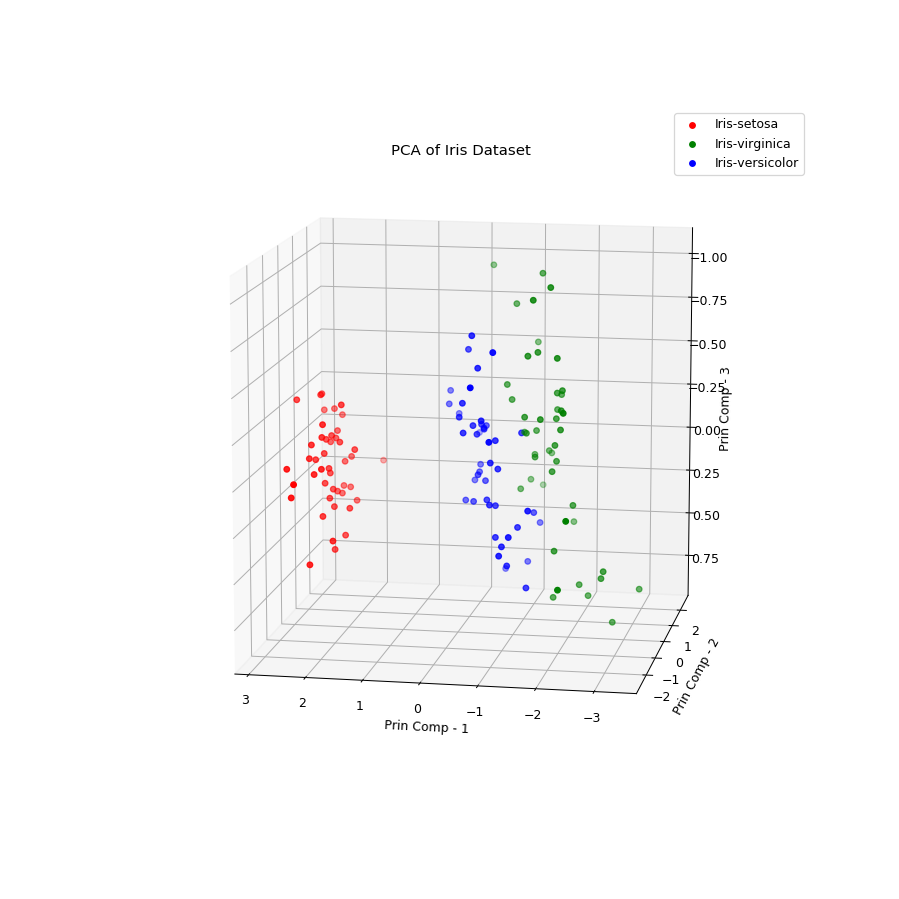

In [73]:
%matplotlib notebook
targets = ['Iris-setosa', 'Iris-virginica','Iris-versicolor']
colors = ['r', 'g', 'b']
if mpca.K == 2:
    plot2DPrincipalComponents (new_dataset,principal_iris_Df,"PCA of Iris Dataset",targets,targets,colors)   
elif mpca.K == 3:
    plot3DPrincipalComponents (new_dataset,principal_iris_Df,"PCA of Iris Dataset",targets,targets,colors)   
else:
    print ('Can not plot K = ', mpca.K)